In [23]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

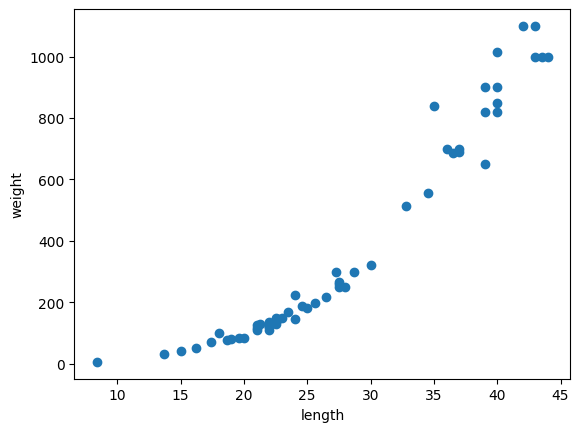

In [24]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel("length")
plt.ylabel("weight")
plt.show()

In [25]:
len(perch_length)
len(perch_weight)
print(perch_length.shape)
print(perch_weight.shape)

(56,)
(56,)


In [60]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

print(train_input.shape, test_input.shape)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

(42,) (14,)


In [37]:
from sklearn.neighbors import KNeighborsRegressor

#knr = KNeighborsRegressor(n_neighbors=5)
knr.n_neightbors=5
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=7)

In [38]:
knr.score(test_input, test_target)

0.9781383949643516

In [41]:
t_input = test_input[2]
p = knr.predict(t_input.reshape(1,-1))

print(f"예측 사용무게:{p}")
print(f"실 무게:{test_target[2]}")

예측 사용무게:[235.]
실 무게:250.0


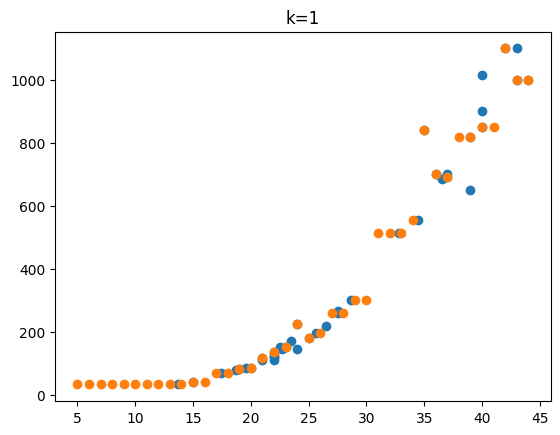

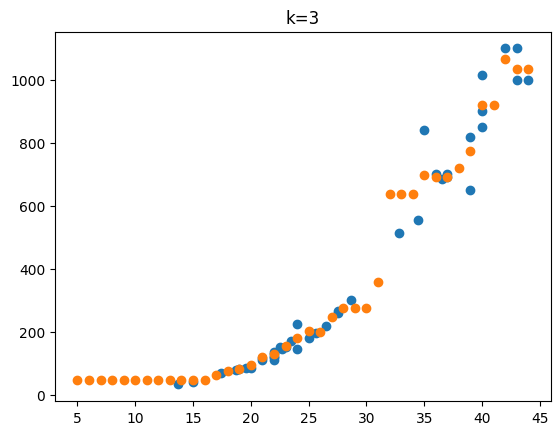

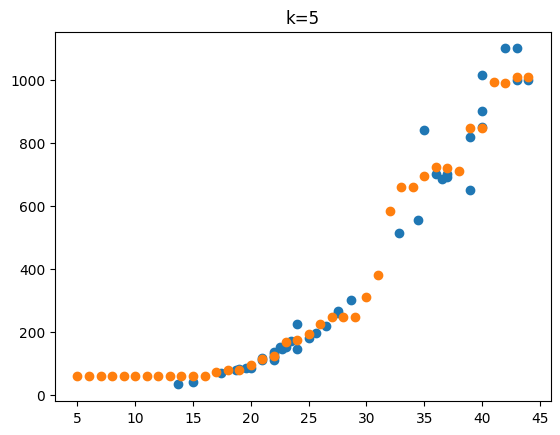

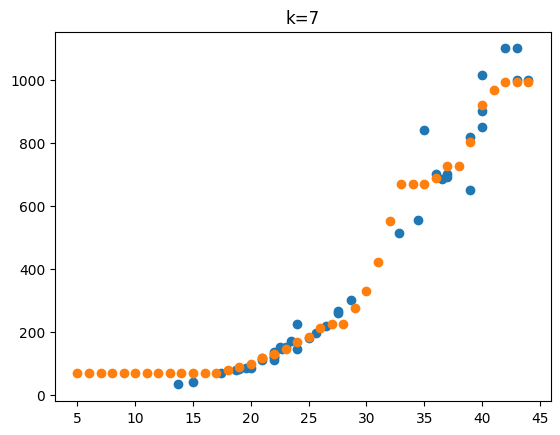

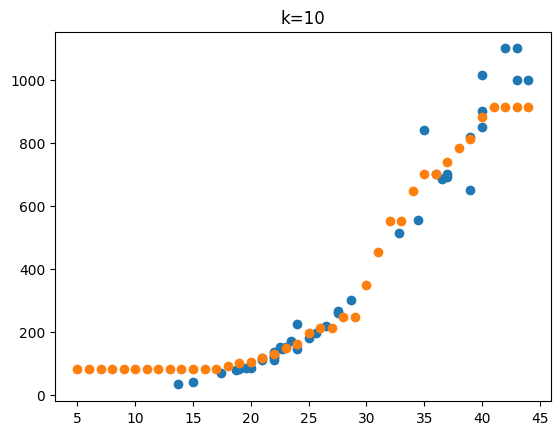

In [46]:
knr = KNeighborsRegressor()
x= np.arange(5, 45).reshape(-1, 1)

for k in [1, 3, 5, 7, 10]:
    knr.n_neighbors = k
    knr.fit(train_input, train_target)
    prediction = knr.predict(x)

    plt.title(f"k={k}, R^2={")
    plt.scatter(train_input, train_target)
    plt.scatter(x, prediction)
    plt.show()

In [49]:
knr = KNeighborsRegressor()
knr.n_neighbors = 3
knr.fit(train_input, train_target)
print(knr.predict([[45]]))
print(knr.predict([[46]]))
print(knr.predict([[47]]))
print(knr.predict([[48]]))
print(knr.predict([[49]]))
print(knr.predict([[50]]))

[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]
[1033.33333333]


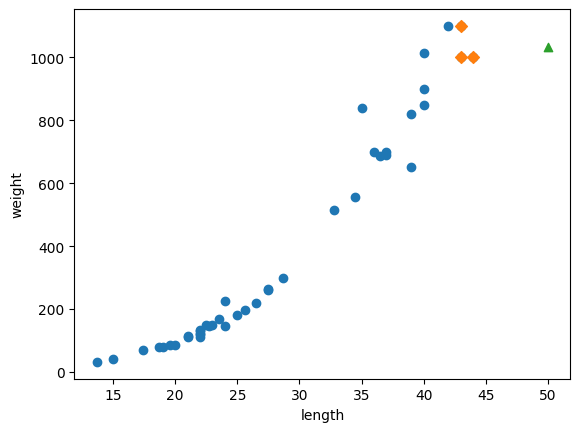

In [53]:
w=50
d,i = knr.kneighbors([[w]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[i], train_target[i], marker='D')
plt.scatter(w, knr.predict([[w]])[0], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [63]:
import matplotlib.pyplot as plt

distances, indexes = knr.kneighbors([50])
plt.scatter(train_input, train_target)
A=lr.coef_
B=lr.intercept_

plt.scatter(train_input, train_target)
plt.plot([10,50], [10*A+B, 50*A+B])
plt.scatter(50, 1241.83860323, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

lr.predict([[50]])==A*50+B
lr.predict([[15]])

ValueError: Expected 2D array, got 1D array instead:
array=[50].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.